In [26]:
!pip install matplotlib

     |████████████████████████████████| 11.3 MB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 898 kB 32.2 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 15.7 MB/s eta 0:00:01
     |████████████████████████████████| 16.8 MB 22.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 20.7 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 23.1 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 16.4 MB/s eta 0:00:01


In [1]:
import matplotlib.pyplot as plt

In [2]:
file = open('solutions/power_test_topo_25_anel_n1_l1.txt', 'r')
lines = file.readlines();
file.close()

consumption_string = lines[0].split('=')[1].strip()
consumption_string = consumption_string[1:len(consumption_string)-1]
consumption_set = [float(x) for x in consumption_string.split(',')]

centralization_string = lines[1].split('=')[1].strip()
centralization_string = centralization_string[1:len(centralization_string)-1]
centralization_set = [float(x) for x in centralization_string.split(',')]

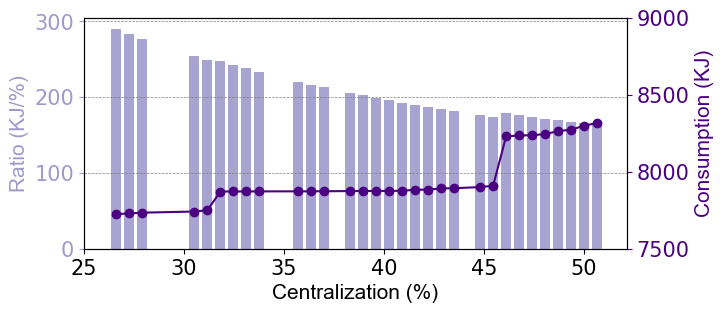

In [14]:
fig, ax1 = plt.subplots(figsize=(7, 3))

color1 = '#9e9acc'
color2 = 'indigo'
alpha = 0.9
ax1.set_ylabel('Ratio (KJ/%)', color=color1, fontsize=15, fontfamily='Arial')
ax1.set_xlabel('Centralization (%)', fontsize=15, fontfamily='Arial')

ax1.tick_params(axis='y', which='major', labelsize=15, colors=color1)
ax1.tick_params(axis='x', which='major', labelsize=15)
ax1.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)

percentage_centralization = [(i / 154) * 100 for i in centralization_set]
energy_consumption = [i * 3.6 for i in consumption_set]

bar = ax1.bar(percentage_centralization, [i / j for i, j in zip(energy_consumption, percentage_centralization)],
                color=color1, alpha=alpha, width=.5)

# plt.yticks([0.00, 0.02, 0.04, 0.06, 0.08])
plt.yticks([0, 100, 200, 300])

ax2 = ax1.twinx()
ax2.set_ylabel('Consumption (KJ)', color=color2, fontsize=15, fontfamily='Arial')

ax2.tick_params(axis='y', which='major', colors=color2, labelsize=15)
ax2.tick_params(axis='x', which='major', labelsize=15)
# ax2.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)

line, = ax2.plot(percentage_centralization, energy_consumption, color=color2, marker='o')

# plt.yticks([2.1, 2.2, 2.3, 2.4, 2.5])
plt.yticks([7500, 8000, 8500, 9000])
plt.xticks([25, 30, 35, 40, 45, 50])

plt.show()


Text(0.5, 1.0, 'Energy Saving')

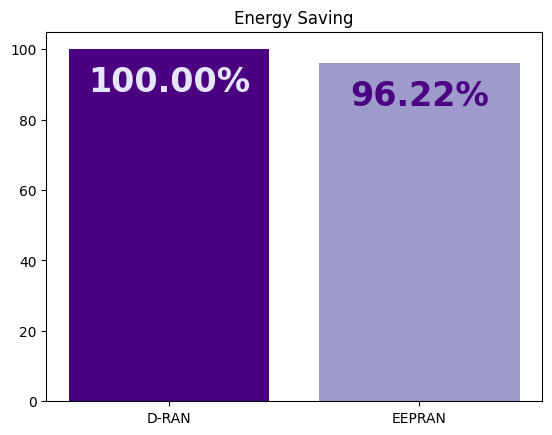

In [31]:
import matplotlib.pyplot as plt

total_energy_eepran = 17128037834.431982 / 17801352633.599995 * 100
total_energy_dran =  100

plt.bar([0, 1], [total_energy_dran, total_energy_eepran], width=0.8, color=['indigo', '#9e9acc'])
plt.text(0, 88, '100.00%', color='lavender', horizontalalignment='center', size=24, fontweight='bold')
plt.text(1, 84, '{:.2f}%'.format(total_energy_eepran), color='indigo', horizontalalignment='center', size=24, fontweight='bold')
plt.xticks([0, 1], ['D-RAN', 'EEPRAN'])
plt.title('Energy Saving')

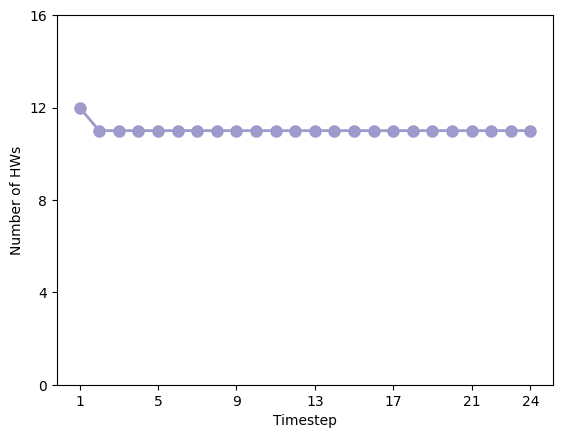

In [53]:
import numpy as np

data = [[12, 25], [11, 26], [11, 27], [11, 28], [11, 29], [11, 30], [11, 31], [11, 32], [11, 33], [11, 34], [11, 35], [11, 36], [11, 37], [11, 38], [11, 39], [11, 40], [11, 41], [11, 42], [11, 43], [11, 44], [11, 45], [11, 46], [11, 47], [11, 48]]

plt.plot(np.matrix(data)[:,1], np.matrix(data)[:,0], '-o', color='#9e9acc', markersize=8, linewidth=2, label='BS')
plt.ylabel('Number of HWs')
plt.xlabel('Timestep')

plt.yticks([0, 4, 8, 12, 16])
plt.xticks([25, 29, 33, 37, 41, 45, 48], [1, 5, 9, 13, 17, 21, 24])


print()

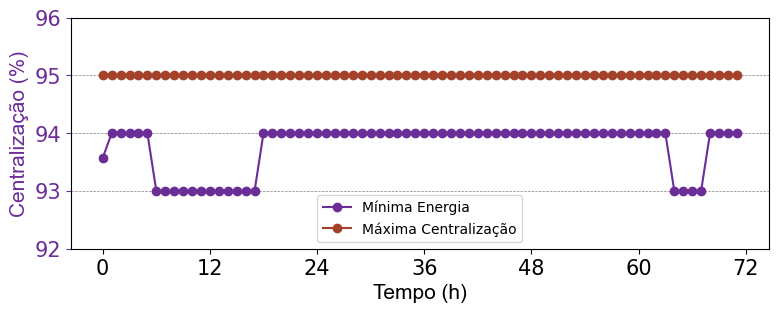

In [32]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

# ---------
# LINE PLOT
# ---------

df_topo = pandas.read_csv("solutions/topo_100_updated", sep=',')
df_cent = pandas.read_csv("solutions/topo_100_centralization", sep=',')

fig, ax1 = plt.subplots(figsize=(9, 3))

color1 = '#96753C'
# color1 = '#9e9acc'
color2 = '#6B2D97'
color3 = '#A34129'

alpha = 0.7
ax1.set_ylabel('Centralização (%)', color=color2, fontsize=15, fontfamily='Arial')
ax1.set_xlabel('Tempo (h)', fontsize=15, fontfamily='Arial')
ax1.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)

ax1.tick_params(axis='y', which='major', labelsize=15, colors=color2)
ax1.tick_params(axis='x', which='major', labelsize=15)

ax1.plot(df_topo['timestamp'][:72], df_topo['centralization'][:72]/7, color=color2, marker='o', label='Mínima Energia')
ax1.plot(df_topo['timestamp'][:72], df_cent['centralization'][:72]/7, color=color3, marker='o', label='Máxima Centralização')

plt.yticks([92, 93, 94, 95, 96])
plt.xticks(range(0, 74, 12))
plt.legend(loc='lower center')

# ------------
# SCATTER PLOT
# ------------

# df = pandas.read_csv("data/T2_100_BS_usage.csv", sep=',')
# ax2 = ax1.twinx()
# ax2.set_ylabel('Carga (Usuários)', color=color1, fontsize=15, fontfamily='Arial')

# ax2.tick_params(axis='y', which='major', colors=color1, labelsize=15)
# ax2.tick_params(axis='x', which='major', labelsize=15)
# ax2.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)

# line, = ax2.plot(df_topo['timestamp'][:72], df.sum(axis=1)[:72], color=color1, alpha=alpha, linestyle=':')

# plt.yticks([0, 300, 600, 900, 1200])
# plt.ticklabel_format(axis='y', style='sci', scilimits=(2,2))

# plt.show()
plt.savefig('centralization.pdf', bbox_inches='tight')


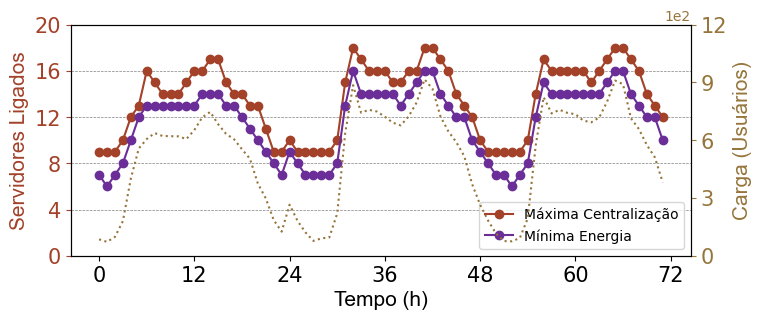

In [77]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

# ---------
# LINE PLOT
# ---------

df_topo = pandas.read_csv("solutions/topo_100_updated", sep=',')
df_cent = pandas.read_csv("solutions/topo_100_centralization", sep=',')
df_dran = pandas.read_csv("solutions/topo_100_dran", sep=',')

fig, ax1 = plt.subplots(figsize=(8, 3))

color1 = '#96753C'
# color1 = '#9e9acc'
color2 = '#6B2D97'
color3 = '#A34129'
color4 = '#3685A3'

alpha = 0.7
ax1.set_ylabel('Servidores Ligados', color=color3, fontsize=15, fontfamily='Arial')
ax1.set_xlabel('Tempo (h)', fontsize=15, fontfamily='Arial')

ax1.tick_params(axis='y', which='major', labelsize=15, colors=color3)
ax1.tick_params(axis='x', which='major', labelsize=15)
ax1.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)

# ax1.plot(df_topo['timestamp'][:72], df_topo['centralization'][:72], color=color2, marker='o')
# ax1.plot(df_topo['timestamp'][:72], df_dran['usedMachines'][:72], color=color4, marker='o', label='DRAN')
ax1.plot(df_topo['timestamp'][:72], df_cent['usedMachines'][:72], color=color3, marker='o', label='Máxima Centralização')
ax1.plot(df_topo['timestamp'][:72], df_topo['usedMachines'][:72], color=color2, marker='o', label='Mínima Energia')

plt.yticks([0, 4, 8, 12, 16, 20])
plt.xticks(range(0, 74, 12))

plt.legend(loc='lower right')
# ------------
# SCATTER PLOT
# ------------

df = pandas.read_csv("data/T2_100_BS_usage.csv", sep=',')
ax2 = ax1.twinx()
ax2.set_ylabel('Carga (Usuários)', color=color1, fontsize=15, fontfamily='Arial')

ax2.tick_params(axis='y', which='major', colors=color1, labelsize=15)
ax2.tick_params(axis='x', which='major', labelsize=15)

line, = ax2.plot(df_topo['timestamp'][:72], df.sum(axis=1)[:72], color=color1, linestyle=':')

plt.yticks([0, 300, 600, 900, 1200])
plt.ticklabel_format(axis='y', style='sci', scilimits=(2,2))

# plt.show()
plt.savefig('servidores.pdf', bbox_inches='tight')


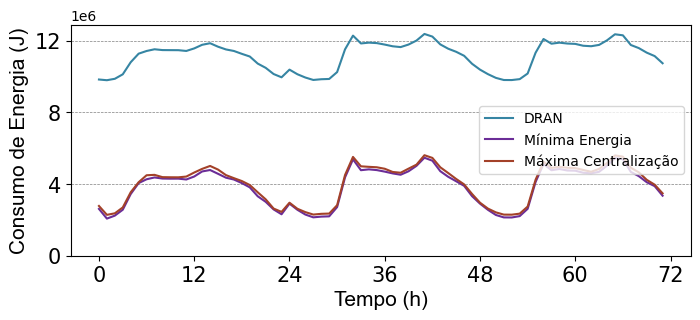

In [72]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

# ---------
# LINE PLOT
# ---------

df_topo = pandas.read_csv("solutions/topo_100_updated", sep=',')
df_cent = pandas.read_csv("solutions/topo_100_centralization", sep=',')
df_dran = pandas.read_csv("solutions/topo_100_dran", sep=',')

fig, ax1 = plt.subplots(figsize=(8, 3))

color1 = '#96753C'
# color1 = '#9e9acc'
color2 = '#6B2D97'
color3 = '#A34129'
color4 = '#3685A3'

alpha = 0.9
ax1.set_ylabel('Consumo de Energia (J)', fontsize=15, fontfamily='Arial')
ax1.set_xlabel('Tempo (h)', fontsize=15, fontfamily='Arial')
ax1.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)

ax1.tick_params(axis='y', which='major', labelsize=15)
ax1.tick_params(axis='x', which='major', labelsize=15)

df_topo['energy'] = df_topo['ranEnergy'] + df_topo['migEnergy'] + df_topo['netEnergy']
df_dran['energy'] = df_dran['ranEnergy'] + df_dran['migEnergy'] + df_dran['netEnergy']
df_cent['energy'] = df_cent['ranEnergy'] + df_cent['migEnergy'] + df_cent['netEnergy']

ax1.plot(df_topo['timestamp'][:72], df_dran['energy'][:72], color=color4, label='DRAN')
ax1.plot(df_topo['timestamp'][:72], df_topo['energy'][:72], color=color2, label='Mínima Energia')
ax1.plot(df_topo['timestamp'][:72], df_cent['energy'][:72], color=color3, label='Máxima Centralização')

plt.yticks([0, 4000000, 8000000, 12000000])
plt.xticks(range(0, 73, 12))
plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
plt.legend(loc='center right')

# plt.show()
plt.savefig('energy_consumption_dran.pdf', bbox_inches='tight')

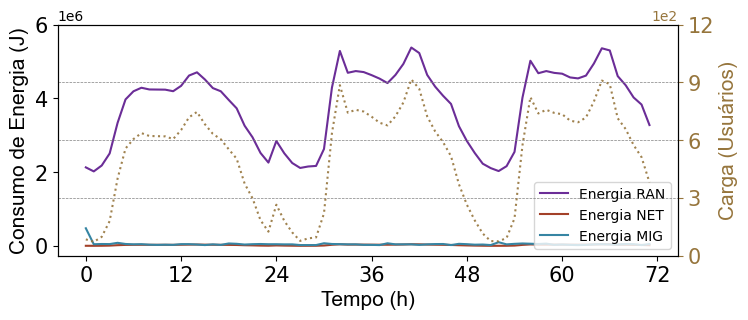

In [53]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

# ---------
# LINE PLOT
# ---------

df_topo = pandas.read_csv("solutions/topo_100_updated", sep=',')

fig, ax1 = plt.subplots(figsize=(8, 3))

color1 = '#96753C'
# color1 = '#9e9acc'
color2 = '#6B2D97'
color3 = '#A34129'
color4 = '#3685A3'

alpha = 0.9
ax1.set_ylabel('Consumo de Energia (J)', fontsize=15, fontfamily='Arial')
ax1.set_xlabel('Tempo (h)', fontsize=15, fontfamily='Arial')

ax1.tick_params(axis='y', which='major', labelsize=15)
ax1.tick_params(axis='x', which='major', labelsize=15)

ax1.plot(df_topo['timestamp'][:72], df_topo['ranEnergy'][:72], color=color2, label='Energia RAN')
ax1.plot(df_topo['timestamp'][:72], df_topo['netEnergy'][:72], color=color3, label='Energia NET')
ax1.plot(df_topo['timestamp'][:72], df_topo['migEnergy'][:72], color=color4, label='Energia MIG')

plt.yticks([0, 2000000, 4000000, 6000000])
plt.xticks(range(0, 194, 12))
# plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
plt.legend(loc='lower right')

# ------------
# SCATTER PLOT
# ------------

df = pandas.read_csv("data/T2_100_BS_usage.csv", sep=',')
ax2 = ax1.twinx()
ax2.set_ylabel('Carga (Usuários)', color=color1, fontsize=15, fontfamily='Arial')

ax2.tick_params(axis='y', which='major', colors=color1, labelsize=15)
ax2.tick_params(axis='x', which='major', labelsize=15)
ax2.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)

line, = ax2.plot(df_topo['timestamp'][:72], df.sum(axis=1)[:72], color=color1, alpha=alpha, label='Devices', linestyle=':')

plt.yticks([0, 300, 600, 900, 1200])
plt.ticklabel_format(axis='y', style='sci', scilimits=(2,2))

# plt.show()
plt.savefig('energy_consumption.pdf', bbox_inches='tight')

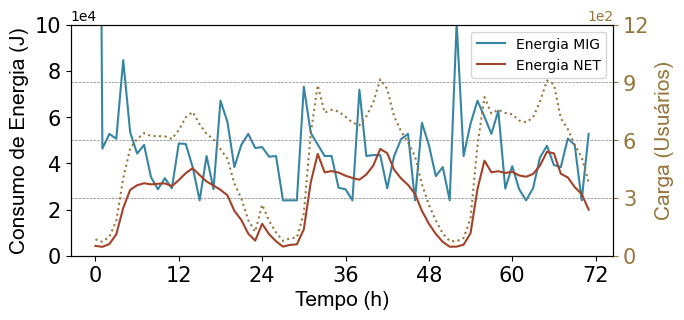

In [55]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

# ---------
# LINE PLOT
# ---------

df_topo = pandas.read_csv("solutions/topo_100_updated", sep=',')

fig, ax1 = plt.subplots(figsize=(7, 3))

color1 = '#96753C'
# color1 = '#9e9acc'
color2 = '#6B2D97'
color3 = '#A34129'
color4 = '#3685A3'

alpha = 0.9
ax1.set_ylabel('Consumo de Energia (J)', fontsize=15, fontfamily='Arial')
ax1.set_xlabel('Tempo (h)', fontsize=15, fontfamily='Arial')

ax1.tick_params(axis='y', which='major', labelsize=15)
ax1.tick_params(axis='x', which='major', labelsize=15)

# ax1.plot(df_topo['timestamp'][:72], df_topo['ranEnergy'][:72], color=color2, label='Energia RAN')
ax1.plot(df_topo['timestamp'][:72], df_topo['migEnergy'][:72], color=color4, label='Energia MIG')
ax1.plot(df_topo['timestamp'][:72], df_topo['netEnergy'][:72], color=color3, label='Energia NET')

plt.yticks([0, 20000, 40000, 60000, 80000, 100000])
plt.ylim([0, 100000])
plt.xticks(range(0, 194, 12))
plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))
plt.legend(loc='best')

# ------------
# SCATTER PLOT
# ------------

df = pandas.read_csv("data/T2_100_BS_usage.csv", sep=',')
ax2 = ax1.twinx()
ax2.set_ylabel('Carga (Usuários)', color=color1, fontsize=15, fontfamily='Arial')

ax2.tick_params(axis='y', which='major', colors=color1, labelsize=15)
ax2.tick_params(axis='x', which='major', labelsize=15)
ax2.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)

line, = ax2.plot(df_topo['timestamp'][:72], df.sum(axis=1)[:72], color=color1, label='Devices', linestyle=':')

plt.yticks([0, 300, 600, 900, 1200])
plt.ticklabel_format(axis='y', style='sci', scilimits=(2,2))

# plt.show()
plt.savefig('energy_consumption_net.pdf', bbox_inches='tight')


In [74]:
df_topo = pandas.read_csv("solutions/topo_100_updated", sep=',')
df_cent = pandas.read_csv("solutions/topo_100_centralization", sep=',')
df_dran = pandas.read_csv("solutions/topo_100_dran", sep=',')

df_topo['energy'] = df_topo['ranEnergy'] + df_topo['migEnergy'] + df_topo['netEnergy']
df_dran['energy'] = df_dran['ranEnergy'] + df_dran['migEnergy'] + df_dran['netEnergy']
df_cent['energy'] = df_cent['ranEnergy'] + df_cent['migEnergy'] + df_cent['netEnergy']

np.mean(df_topo['energy']) / (np.mean(df_dran['energy']))

0.3508652387046146